<a href="https://colab.research.google.com/github/yannick42/notebooks/blob/master/_notebooks/2022-04-24-Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "[DRAFT] Titanic dataset"
> "Quick EDA/Plots & Machine Learning"

- toc: true
- badges: false
- comments: false
- author: Yannick
- categories: [EDA, ML]

# Setup

In [1]:
%%capture
!pip install kaggle --upgrade

In [2]:
%%capture
import os
from getpass import getpass
kaggle_username = input("Kaggle USERNAME : ")
os.environ['KAGGLE_USERNAME'] = kaggle_username
kaggle_key = getpass("Kaggle KEY for "+os.environ.get('KAGGLE_USERNAME')+": ")
os.environ["KAGGLE_KEY"] = kaggle_key

Kaggle USERNAME : yannick42
Kaggle KEY for yannick42: ··········


In [3]:
!kaggle competitions download -c titanic -p my_data
!cd my_data && unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 17.4MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
#hide
# Search for another dataset ...
# !kaggle datasets list -s sentiment

In [5]:
# .kaggle
# my_data\gender_submission.csv
# my_data\test.csv
# my_data\train.csv
!ls -la my_data

total 136
drwxr-xr-x 2 root root  4096 Apr 26 17:59 .
drwxr-xr-x 1 root root  4096 Apr 26 17:59 ..
-rw-r--r-- 1 root root  3258 Dec 11  2019 gender_submission.csv
-rw-r--r-- 1 root root 28629 Dec 11  2019 test.csv
-rw-r--r-- 1 root root 34877 Apr 26 17:59 titanic.zip
-rw-r--r-- 1 root root 61194 Dec 11  2019 train.csv


# Load data + transformations

In [6]:
import pandas as pd

# Pandas basics : https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html

def feature_eng(df):
  # Gender: str -> int
  gender = {'male': 1, 'female': 2} 
  df['Sex'] = [gender[item] for item in df['Sex']] 

  # Fill missing values with mean
  df['Age'].fillna((df['Age'].mean()), inplace=True)
  df['Fare'].fillna((df['Fare'].mean()), inplace=True)

  # see recommendations by https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/
  df['Age*Class'] = df['Age'] * df['Pclass']
  df['SibSp'].fillna(0, inplace=True) # Number of Siblings/Spouses Aboard
  df['Parch'].fillna(0, inplace=True) # Number of Parents/Children Aboard
  df['Family_Size'] = df['SibSp'] + df['Parch']
  df['Fare_Per_Person'] = df['Fare']/(df['Family_Size']+1)

  df.Embarked.fillna(0, inplace=True) # unknown embarkation place
  embarked = {'S': 1, 'C': 2, 'Q': 3, 0: 0} # Southampton (UK, Apr 10th), Cherbourg (France, Apr 10th), Queenstown ("Ireland"..., Apr 11th)
  df['Embarked'] = [embarked[item] for item in df['Embarked']]

  return df

###
### TRAIN DATA (+Transformations)
###
df = pd.read_csv('my_data/train.csv')
df = feature_eng(df)
#df.describe()

###
### TEST DATA (+Transformations)
###
df_test = pd.read_csv('my_data/test.csv')
df_test = feature_eng(df_test)
#df_test.describe()

# General informations

The Titanic departed from Southampton on April 10th, to Cherbourg, to Queenstown (the 11th). She sinked the 15th of April 1912

In [7]:

# the 13 youngest deads below 5 y.o. :(
df[(df.Survived == 0) & (df.Age <= 5)].sort_values(by='Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age*Class,Family_Size,Fare_Per_Person
164,165,0,3,"Panula, Master. Eino Viljami",1,1.0,4,1,3101295,39.6875,NaN,1,3.0,5,6.614583
386,387,0,3,"Goodwin, Master. Sidney Leonard",1,1.0,5,2,CA 2144,46.9000,NaN,1,3.0,7,5.862500
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,1,6.0,4,4.215000
16,17,0,3,"Rice, Master. Eugene",1,2.0,4,1,382652,29.1250,NaN,3,6.0,5,4.854167
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",2,2.0,4,2,347082,31.2750,NaN,1,6.0,6,4.467857
205,206,0,3,"Strom, Miss. Telma Matilda",2,2.0,0,1,347054,10.4625,G6,1,6.0,1,5.231250
297,298,0,1,"Allison, Miss. Helen Loraine",2,2.0,1,2,113781,151.5500,C22 C26,1,2.0,3,37.887500
642,643,0,3,"Skoog, Miss. Margit Elizabeth",2,2.0,3,2,347088,27.9000,NaN,1,6.0,5,4.650000
824,825,0,3,"Panula, Master. Urho Abraham",1,2.0,4,1,3101295,39.6875,NaN,1,6.0,5,6.614583
374,375,0,3,"Palsson, Miss. Stina Viola",2,3.0,3,1,349909,21.0750,NaN,1,9.0,4,4.215000


# Pie Charts

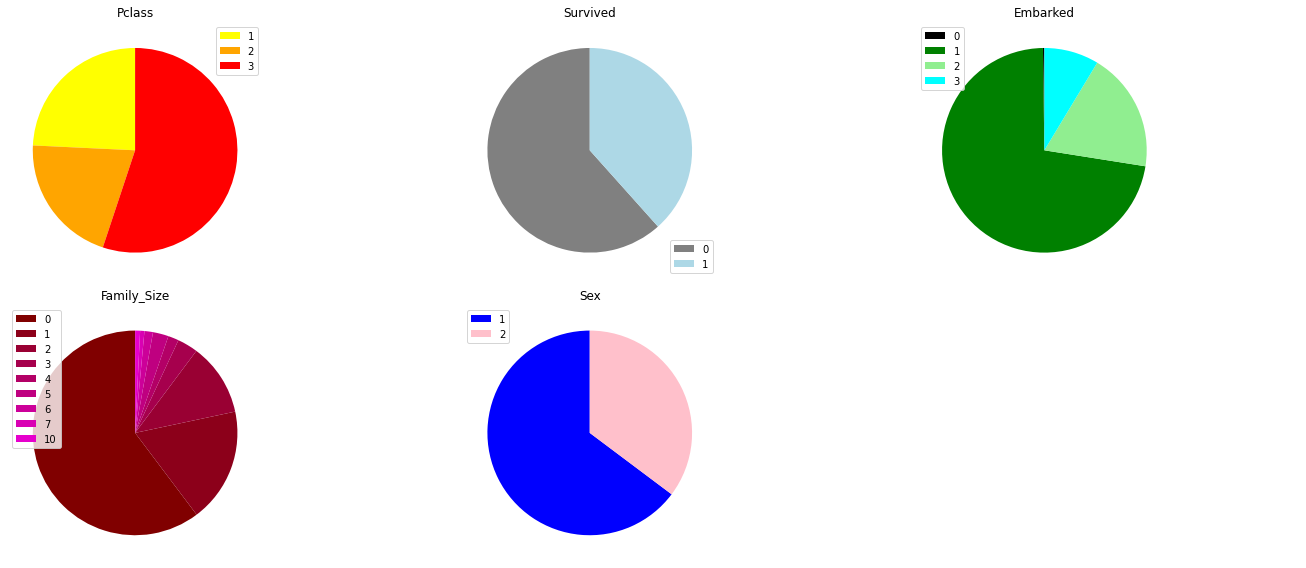

In [10]:
#collapse-hide

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

row = 2
col = 3

fig, ax = plt.subplots(row, col, figsize=(20,8))

list_columns = ['Pclass', 'Survived', 'Embarked', 'Family_Size', 'Sex', None]

# to generate a gradient of colors
colors = [(.5, 0, 0), (1, 0, 1)] # from first color to the last
cm = LinearSegmentedColormap.from_list("Custom", colors, N=11) # 11 shades

colors = [
  ['yellow', 'orange', 'red'],
  ['grey', 'lightblue'],
  ['black', 'green', 'lightgreen', 'cyan'],
  cm(np.linspace(0, 1, num=11)), # equally "spaced" 11 colors...
  ['blue', 'pink'],
]

i = 0
for column in list_columns:

  axis = ax[i//col][i%(row+1)]
  if column is None:
    axis.axis('off') # hide
  else:
    s = df.groupby([column]).size().to_frame('size').reset_index()
    
    axis.set_title(column)
    # plot pie chart
    patches, texts = axis.pie(s['size'], colors=colors[i], startangle=90)
    # add a legend
    axis.legend(patches, s[column].unique(), loc="best")
  i=i+1

plt.tight_layout()

# Scatterplot

4 numerical variables in one scatterplot : x=Age / y=Fare / color=Pclass : Survived or not

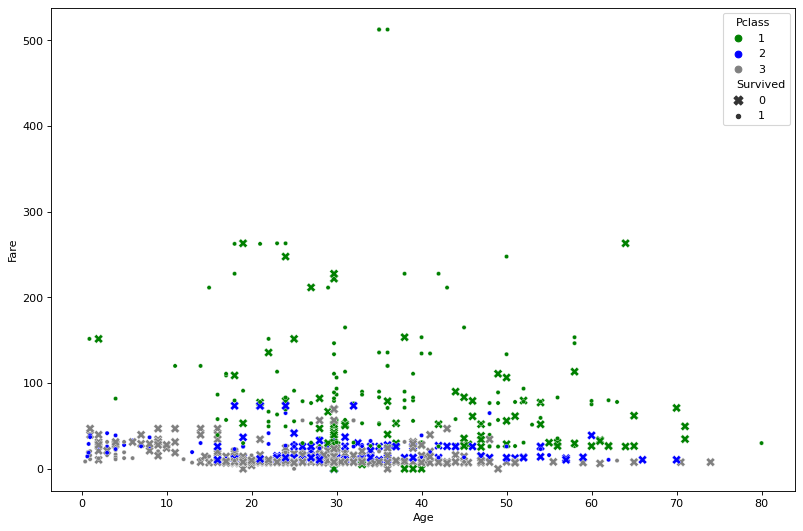

In [40]:
#collapse-hide

from matplotlib.pyplot import figure
import seaborn as sns

figure(figsize=(12, 8), dpi=80)

markers = {0: "X", 1: "o"}
sns.scatterplot(
    data=df,
    x="Age",
    y="Fare",
    hue="Pclass",
    palette=['green','blue','grey'],
    style="Survived",
    size="Survived",
    sizes=(15, 65),
    markers=markers
);


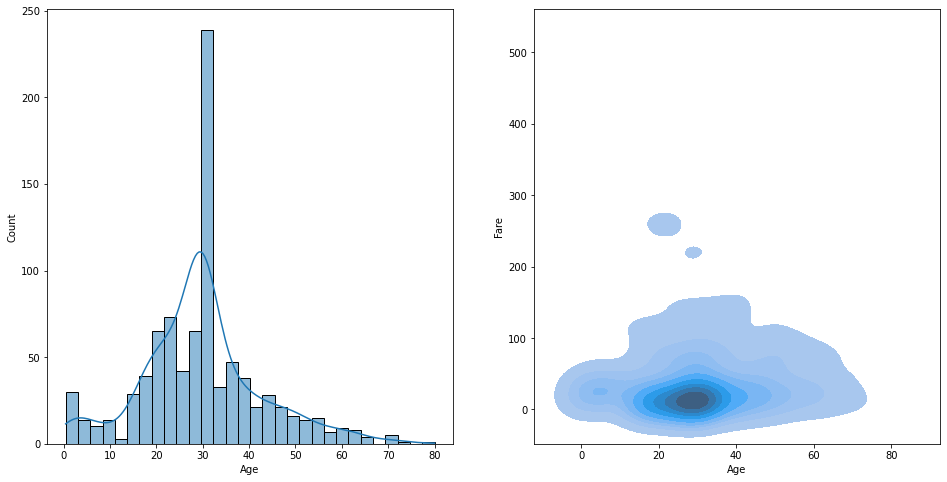

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

sns.histplot(ax=ax[0], data=df, x="Age", kde=True);
sns.kdeplot(ax=ax[1], data=df, x="Age", y="Fare", fill=True)

In [ ]:
#hide

%matplotlib inline

choose = "XGB"  # Ridge

# MODELS
import xgboost as xgb
from sklearn.linear_model import Ridge

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to find hyperparameters
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

nb_split = 8

X = df.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']]
y = df['Survived']


# ==> DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
splited = np.array_split(X, nb_split)
X_validation_test = pd.DataFrame(splited[0])
X = pd.DataFrame(np.concatenate(splited[1:]))

ysplited = np.array_split(y, nb_split)
y_validation_test = pd.DataFrame(ysplited[0])
y = pd.DataFrame(np.concatenate(ysplited[1:]))






# X_validation_set = df_test.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']]
# dtrain = xgb.DMatrix(X.to_numpy(), y.to_numpy())
# dtest = xgb.DMatrix(X_validation_set.to_numpy())
# specify parameters via map
# param = {'max_depth':6, 'eta':1, 'objective':'binary:logistic' }
# num_round = 6
# bst = xgb.train(param, dtrain, num_round)

if choose == "XGB":

  # About log loss : https://medium.datadriveninvestor.com/understanding-the-log-loss-function-of-xgboost-8842e99d975d
  xgb_model = xgb.XGBClassifier(eval_metric="logloss")

  # best found : {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
  optimization_dict = {
    'max_depth': [6], #[4, 6, 8],
    'n_estimators': [100], #[50, 100, 200],
    'learning_rate': [0.01], #[0.001, 0.01, 0.1]
  }
  model = GridSearchCV(xgb_model, optimization_dict, scoring='accuracy', verbose=1)

elif choose == "Ridge":

  ridge_model = Ridge()
  # best found : {'alpha': ?}
  optimization_dict = {
    'alpha': [0.001, 0.01, 0.1]
  }
  model = GridSearchCV(ridge_model, optimization_dict, scoring='accuracy', verbose=1)



print("X (shape) : ", X.shape)
print("y (shape) : ", y.shape)
model.fit(X.to_numpy(), y.to_numpy().ravel())

# Results
print("Best score :", model.best_score_) # Mean cross-validated score of the best_estimator
#print(model.best_params_)
bst = model.best_estimator_

# make prediction
preds = model.predict(X_validation_test.to_numpy())

#print("X_validation_test.shape", X_validation_test.shape)
print("112 predictions") # :", preds)
#print("y_validation_test.shape", y_validation_test.shape)


#indices = preds.argmax(axis=1)

# flatten() -> ?
data = y_validation_test.Survived
#preds = preds.reshape(1, -1)
#print("y_validation_test.Survived.to_numpy().flatten()", data)

#print("data.shape", data.shape)
#print("preds.shape", preds.shape)
#print("data", data)
#print("indices", indices)

#
# Confusion Matrix
#
cm = confusion_matrix(data, preds)
#print(cm)
sns.heatmap(cm, annot=True, fmt='3.0f', cmap="summer", xticklabels=["Deceased", "Survived"], yticklabels=["Deceased", "Survived"])
plt.title('Confusion matrix of ' + choose, y=1.05, size=15)

#xgb.plot_importance(model.best_estimator_)

plt.show()

In [ ]:
#hide

# 'SibSp', 'Parch', 
#X_validation_set = df_test.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']]
#X_validation_set.describe()

# True => il y a un "NaN" dans les données
#print(np.any(np.isnan(X_validation_set)))

preds = bst.predict(df_test.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']].to_numpy())

submission = pd.DataFrame()
submission['PassengerId'] = df_test['PassengerId']
print(preds)
submission['Survived'] = pd.DataFrame([round(value) for value in preds], dtype=int)
print(submission.shape)

submission.to_csv('titanic_submission.csv', index=False)

In [ ]:
#hide

import numpy as np
import matplotlib.pyplot as plt
from random import randrange 
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  #for accuracy_score

from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

names = [
  "Decision Tree",
  "Ridge Regression", # Linear least squares with l2 regularization
  "Random Forest",
  "AdaBoost",
  "Linear SVM",
  "RBF SVM"
]
classifiers = [
  DecisionTreeClassifier(max_depth=5), # => Does not accept 'str' types
  Ridge(alpha=1.0),
  RandomForestClassifier(max_depth=7, n_estimators=8, max_features=6, criterion="gini"),
  AdaBoostClassifier(),
  SVC(kernel="linear", C=0.025),
  SVC(gamma=2, C=1)
]

# https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e
# See also : StratifiedKFold, GroupKFold, RepeatedKFold
kf = KFold(n_splits=4)

# , 'SibSp', 'Parch', 'Embarked', 'Age'
X = df.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']]
y = df['Survived']

nb_split = 8
random_int = randrange(8)

"""
https://www.kaggle.com/vinothan/titanic-model-with-90-accuracy
https://towardsdatascience.com/how-i-got-98-prediction-accuracy-with-kaggles-titanic-competition-ad24afed01fc ??????
"""

splited = np.array_split(X, nb_split)
X_validation_test = pd.DataFrame(splited[0])
X = pd.DataFrame(np.concatenate(splited[1:]))

ysplited = np.array_split(y, nb_split)
y_validation_test = pd.DataFrame(ysplited[0])
y = pd.DataFrame(np.concatenate(ysplited[1:]))

"""
=> ne marche pas !
splited = np.array_split(X, nb_split)
X_validation_test = pd.DataFrame(splited[random_int])
splited = np.delete(splited, random_int, 1)
X = pd.DataFrame(np.concatenate(splited))

ysplited = np.array_split(y, nb_split)
y_validation_test = pd.DataFrame(ysplited[random_int])
ysplited = np.delete(ysplited, random_int)
y = pd.DataFrame(np.concatenate(ysplited))
"""

"""
=> ne marche pas !
X_validation_test = X.sample(frac=100/8)
X = X.loc[~X.index.isin(X_validation_test.index)]

y_validation_test = y.loc[y.index.isin(X_validation_test.index)]
y = y.loc[~y.index.isin(X_validation_test.index)]
"""

##
## MAIN Loop over each classifiers
##
for name, clf in zip(names, classifiers):
  print('Classifier name :', name)
  for train_index, test_index in kf.split(X):
    clf.fit(X.iloc[train_index], y.iloc[train_index])
    score = clf.score(X.iloc[test_index], y.iloc[test_index]) # Accuracy
    print("Accuracy:", score)
  
  y_pred = clf.predict(X_validation_test.to_numpy())

  #accuracy = accuracy_score(y_pred, y_validation_test.to_numpy()) * 100
  #print('The accuracy of '+name+' is', round(accuracy, 2))

  y_test = y_validation_test.Survived.to_numpy()
  y_prediction = y_pred.flatten()
  y_prediction[y_prediction > 0.5] = 1
  y_prediction[y_prediction <= 0.5] = 0
  
  # ValueError: Classification metrics can't handle a mix of binary and continuous targets
  cm = confusion_matrix(y_test, y_prediction)

  sns.heatmap(cm, annot=True, fmt='3.0f', cmap="summer")
  plt.title('Confusion matrix of ' + name, y=1.05, size=15)
  plt.show()


In [ ]:
#hide

# 'SibSp', 'Parch', 
X_validation_set = df_test.loc[:, ['Pclass', 'Sex', 'Fare', 'Age*Class', 'Family_Size', 'Fare_Per_Person']]
#X_validation_set.describe()

# True => il y a un "NaN" dans les données
#print(np.any(np.isnan(X_validation_set)))

#values = classifiers[names.index("Ridge Regression")].predict(X_validation_set)
values = classifiers[names.index("Random Forest")].predict(X_validation_set)

values[values > 0.5] = 1
values[values <= 0.5] = 0

submission = pd.DataFrame()
submission['PassengerId'] = df_test['PassengerId']
submission['Survived'] = values.astype(int)
print(submission.shape)

submission.to_csv('titanic_submission.csv', index=False)


In [ ]:
#hide

!cat titanic_submission.csv

In [ ]:
#hide

!kaggle competitions submit -c titanic -f titanic_submission.csv -m "Titanic dataset - XGBoost (test)"